# Request

In [1]:
import numpy as np
import base64
from matplotlib import pyplot as plt

def base64_decode_image(a, dtype, shape):

    a = bytes(a, encoding='utf-8')

    # convert the string to a NumPy array using the supplied data
    # type and target shape
    a = np.frombuffer(base64.decodebytes(a), dtype=dtype)
    a = a.reshape(shape)

    # return the decoded image
    return a


In [2]:
import requests

url = "http://127.0.0.1:5000/predict"

payload={}
files=[
  ('image',('damaged003_jpg.rf.6999e73cd82f57970e729b22afef1ce4.jpg',open('/home/alexpm94/QR/data/train/damaged003_jpg.rf.6999e73cd82f57970e729b22afef1ce4.jpg','rb'),'image/jpeg'))
]
headers = {}

response = requests.request("POST", url, headers=headers, data=payload, files=files).json()

# Visualization

Once we have the client response, we can convert the image from base64 to a numpy array. The response in the section "corrected_image", has 2 contents.

1. Image shape
2. Image base64

With thinformation we can decode the base64 image.

In [3]:
images = []
titles = []

for i in range(len(response["predictions"])):
    shape, image_b64 = response["predictions"][i]["corrected_image"]
    qr_content = response["predictions"][i]["qr_content"]
    
    image = base64_decode_image(image_b64, np.uint8, shape)    
    images.append(image)
    titles.append(qr_content)


In [4]:
def plot_gallery(images, titles, n_row=6, n_col=3):
    """Helper function to plot a gallery"""
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    plt.subplots_adjust(bottom=0, left=0, right=1.1, top=1)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

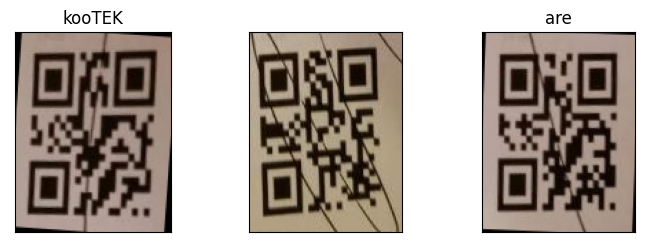

In [5]:
plot_gallery(images, titles, n_row=1, n_col=len(images))